# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчет-и-добавление-в-таблицу:-цена-квадратного-метра-(qm_price)" data-toc-modified-id="Расчет-и-добавление-в-таблицу:-цена-квадратного-метра-(qm_price)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет и добавление в таблицу: цена квадратного метра (qm_price)</a></span></li><li><span><a href="#-Расчет-и-добавление-в-таблицу:-день-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="-Расчет-и-добавление-в-таблицу:-день-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span> Расчет и добавление в таблицу: день недели, месяц и год публикации объявления</a></span></li><li><span><a href="#-Расчет-и-добавление-в-таблицу:-этаж-квартиры;-варианты-—-первый,-последний,-другой" data-toc-modified-id="-Расчет-и-добавление-в-таблицу:-этаж-квартиры;-варианты-—-первый,-последний,-другой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span> Расчет и добавление в таблицу: этаж квартиры; варианты — первый, последний, другой</a></span></li><li><span><a href="#-Расчет-и-добавление-в-таблицу:-соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей" data-toc-modified-id="-Расчет-и-добавление-в-таблицу:-соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span> Расчет и добавление в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-площади" data-toc-modified-id="Изучение-площади-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение площади</a></span></li><li><span><a href="#Изучение-цены" data-toc-modified-id="Изучение-цены-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение цены</a></span></li><li><span><a href="#Изучение-числа-комнат" data-toc-modified-id="Изучение-числа-комнат-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучение числа комнат</a></span></li><li><span><a href="#Изучение-высоты-потолков" data-toc-modified-id="Изучение-высоты-потолков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение высоты потолков</a></span></li><li><span><a href="#Изучите-время-продажи-квартиры." data-toc-modified-id="Изучите-время-продажи-квартиры.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучите время продажи квартиры.</a></span></li><li><span><a href="#Уберите-редкие-и-выбивающиеся-значения" data-toc-modified-id="Уберите-редкие-и-выбивающиеся-значения-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Уберите редкие и выбивающиеся значения</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры?</a></span></li><li><span><a href="#Изучите-предложения-квартир-в-Санкт-Петербурге" data-toc-modified-id="Изучите-предложения-квартир-в-Санкт-Петербурге-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Изучите предложения квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Выделите-сегмент-квартир-в-центре" data-toc-modified-id="Выделите-сегмент-квартир-в-центре-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Выделите сегмент квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') # открытие файла и устранение склейки данных
pd.set_option('display.max_columns',None)#необходимо для отображения всех столбцов (удаление "...")

In [2]:
display(df.info())
display(df.head())
display(df[df.isna().any(axis=1)].head(10)) #на начальном этапе - поиск пустых значений для анализа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

В результате анализа полученного массива информации выявлены следующие явные проблемы:
 - «склейка» данных;
 - некорректное название столбца «cityCenters_nearest»( с точки зрения «змеиного регистра»;
 - «first_day_exposition» (дата публикации) имеет тип object;
 - «last_price» (стоимость) имеет тип float;
 - «floors_total» (общее количество этажей в доме) имеет тип float;
 - «is_apartment» (апартаменты (булев тип)) имеет тип object;
 - «balcony» (число балконов ) имеет тип float
 - «parks_around3000» (число парков в радиусе 3 км) имеет тип float
 - «ponds_around3000» (число водоёмов в радиусе 3 км) имеет тип float
 - «days_exposition» (сколько дней было размещено объявление (от публикации до снятия)) имеет тип float

Также есть явные проблемы со значениями данных в столбцах:
 - «ceiling_height»: в некоторых случаях значение более 6м;
 - «floors_total»: отсутствие значений - данная проблема методом подстановки значений не может быть устранена, т.к. на косвенно можно предположить, но не утверждать о корректном значении (например этаж = максимальной этажности дома и т.п.)
 - «is_apartment»: принимает значения «nan», «False» и «True»;
 - «locality_name»: имеет в названии варианты написания «посёлок» и «поселок»;
 - «balcony», «parks_around3000» «ponds_around3000», «days_exposition»: принимают значения «nan»


## Предобработка данных

In [3]:
# некорректное название столбца «cityCenters_nearest»( с точки зрения «змеиного регистра»)
df.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'}, inplace=True) # переименование столбца

#«first_day_exposition» (дата публикации) имеет тип object
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])


# «is_apartment»: принимает значения «nan», «False» и «True» - изменяем значение nan на False
# «is_apartment» (апартаменты (булев тип)) имеет тип object - ПРИ ИЗМЕНЕНИИ ЗНАЧЕНИЯ АВТОМАТИЧЕСКИ МЕНЯЕТ НА ТИП BOOL
# положим, что если не указано, значит апартаментами не является
df['is_apartment'] = df['is_apartment'].fillna(False)


# «last_price» (стоимость) имеет тип float
df['last_price'] = df['last_price'].fillna(0).abs().astype('Int64')


#«floors_total» (общее количество этажей в доме) имеет тип float
# заменили тип данных, т.к. количество этажей не может быть дробным числом
df['floors_total'] = df['floors_total'].abs().astype('Int64')

# «balcony» (число балконов) имеет тип float
# «balcony»: принимает значения «nan» и целые значения - изменяем значение nan на "0"
# положим, что если не указано, количество балконов "0" и значение не может быть дробным
df['balcony'] = df['balcony'].fillna(0).abs().astype('Int64')

#«parks_around3000» (число парков в радиусе 3 км) имеет тип float - обрабатываем аналогично предыдущему
#«ponds_around3000» (число водоёмов в радиусе 3 км) имеет тип float - обрабатываем аналогично предыдущему
df['parks_around3000'] = df['parks_around3000'].fillna(0).abs().astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).abs().astype('Int64')

#«locality_name»: имеет в названии варианты написания «посёлок» и «поселок»
df['locality_name']= df['locality_name'].replace(to_replace='посёлок', value='поселок', regex=True)

In [4]:
#«days_exposition» (сколько дней было размещено объявление (от публикации до снятия)) 
#       имеет тип float - обрабатываем аналогично предыдущему
# Округлили, т.к. значения после занятой для данного параметра несущественны
df['days_exposition'] = df['days_exposition'].fillna(0).abs().round().astype('Int64')
df['year'] = df['first_day_exposition'].dt.year
print('Пропусков в 2014 году:', df[(df['days_exposition'] == 0)&(df['year'] == 2014)]['days_exposition'].count())
print('Пропусков в 2015 году:', df[(df['days_exposition'] == 0)&(df['year'] == 2015)]['days_exposition'].count())
print('Пропусков в 2016 году:', df[(df['days_exposition'] == 0)&(df['year'] == 2016)]['days_exposition'].count())
print('Пропусков в 2017 году:', df[(df['days_exposition'] == 0)&(df['year'] == 2017)]['days_exposition'].count())
print('Пропусков в 2018 году:', df[(df['days_exposition'] == 0)&(df['year'] == 2018)]['days_exposition'].count())
print('Пропусков в 2019 году:', df[(df['days_exposition'] == 0)&(df['year'] == 2019)]['days_exposition'].count())


Пропусков в 2014 году: 18
Пропусков в 2015 году: 70
Пропусков в 2016 году: 67
Пропусков в 2017 году: 271
Пропусков в 2018 году: 959
Пропусков в 2019 году: 1796


## Расчёты и добавление результатов в таблицу

<h3>Расчет и добавление в таблицу: цена квадратного метра (qm_price)

In [5]:
df['qm_price'] = df['last_price']/df['total_area']
# Округлили и присвоили тип столбца Целое
df['qm_price'] = df['qm_price'].astype('Int64')


display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,qm_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,2019,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,2018,82920
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2015,92785
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,2015,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2018,100000


<h3> Расчет и добавление в таблицу: день недели, месяц и год публикации объявления

In [6]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,qm_price,day_of_week,month
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,2019,120370,3,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,2018,82920,1,12
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2015,92785,3,8
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,2015,408176,4,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2018,100000,1,6


<h3> Расчет и добавление в таблицу: этаж квартиры; варианты — первый, последний, другой

In [7]:
def f_id(fl):
    if fl['floor']==1:
        return 'Первый'
    elif fl['floor'] == fl['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
 

df['id_floor']=df.apply(lambda f: f_id,axis=1) 

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,qm_price,day_of_week,month,id_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,2019,120370,3,3,<function f_id at 0x7f2e030d6550>
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,2018,82920,1,12,<function f_id at 0x7f2e030d6550>
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2015,92785,3,8,<function f_id at 0x7f2e030d6550>
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,2015,408176,4,7,<function f_id at 0x7f2e030d6550>
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2018,100000,1,6,<function f_id at 0x7f2e030d6550>


<h3> Расчет и добавление в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

In [8]:
# Соотношение жилой и общей площади (ratio_area)
df['ratio_area'] = df['living_area']/df['total_area']

# Отношение площади кухни к общей
df['ratio_kitchen_area'] = df['kitchen_area']/df['total_area']

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,qm_price,day_of_week,month,id_floor,ratio_area,ratio_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,2019,120370,3,3,<function f_id at 0x7f2e030d6550>,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,2018,82920,1,12,<function f_id at 0x7f2e030d6550>,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2015,92785,3,8,<function f_id at 0x7f2e030d6550>,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,2015,408176,4,7,<function f_id at 0x7f2e030d6550>,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2018,100000,1,6,<function f_id at 0x7f2e030d6550>,0.320000,0.410000


## Исследовательский анализ данных

<h3>Изучение площади

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

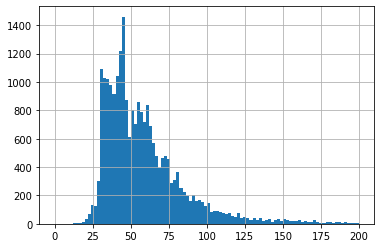

In [9]:
display(df['total_area'].describe())

df['total_area'].hist(bins=100,range=(0,200))
#display(df.query('total_area > 500')) 
#display(df.query('total_area <20')) 

<b>Выводы по параметру "Площадь":</b>
1)	Значения заполнены по всем строкам<br>
2)	Минимальное значение 12<br>
3)	Максимальное значение 900<br>
4)	Из графика видно, что основная масса квартир с площадью до 100 м2

<h3>Изучение цены

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

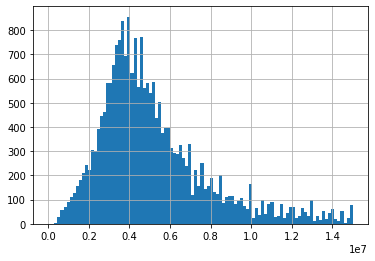

In [10]:
display(df['last_price'].describe())

df['last_price'].hist(bins=100,range=(0,15000000))

<b>Выводы по параметру "Цена":</b>
1)	Значения заполнены по всем строкам<br>
2)	Минимальное значение 12 190р.<br>
3)	Максимальное значение 763 000 000<br>
4)	Из графика видно, что основная стоимость квартир находится у занчения 4 000 000р.

<h3>Изучение числа комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,qm_price,day_of_week,month,id_floor,ratio_area,ratio_kitchen_area
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,True,False,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181,2017,90740,3,3,<function f_id at 0x7f2e030d6550>,0.574074,NaN
349,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45,2017,92800,2,9,<function f_id at 0x7f2e030d6550>,0.680000,NaN
440,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64,2018,91479,0,3,<function f_id at 0x7f2e030d6550>,0.912947,NaN
508,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,False,True,NaN,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430,2017,98110,1,3,<function f_id at 0x7f2e030d6550>,0.706395,NaN
608,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29,2019,74000,2,2,<function f_id at 0x7f2e030d6550>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14,2017,123076,4,9,<function f_id at 0x7f2e030d6550>,0.692308,NaN
23442,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,False,True,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4,2017,90252,3,9,<function f_id at 0x7f2e030d6550>,0.649819,NaN
23554,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31,2018,128846,4,9,<function f_id at 0x7f2e030d6550>,NaN,NaN
23592,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,False,True,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82,2017,50000,5,11,<function f_id at 0x7f2e030d6550>,0.620690,NaN


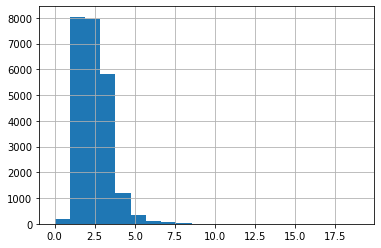

In [11]:
display(df['rooms'].describe())

df['rooms'].hist(bins=20,range=(0,19))

display(df.query('rooms < 1'))

<b>Выводы по параметру "Число комнат":</b>
1)	Значения заполнены по всем строкам<br>
2)	В 197 случаях значение комнат указано как "0". Можно предположить, что указано в случае, когда по данному объекту указано, что это студия или свободная планировка<br>
3)	Максимальное значение 19<br>
4)	Из графика видно, что основная часть квартир с 1-3 комнатами

<h3>Изучение высоты потолков

/tmp/ipykernel_357/110832590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ceiling_height'][df['ceiling_height'] >11 ] = df['ceiling_height'][df['ceiling_height'] >11 ]/10


count    14504.000000
mean         2.728739
std          0.306050
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

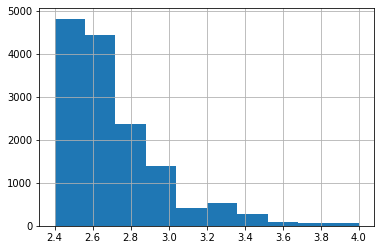

In [12]:
df['ceiling_height'][df['ceiling_height'] >11 ] = df['ceiling_height'][df['ceiling_height'] >11 ]/10

display(df['ceiling_height'].describe())

df['ceiling_height'].hist(range=(2.4,4))

<b>Выводы по параметру "Высота потолков":</b>
1)	Значения заполнены приблизительно в половине случаев<br>
2)	Значения более 10м представляются маловероятными, тем более с учетом того, что данные объекты находятся в многоэтажном жилом фонде. Исходя из изложенного, можно для значений более 11м разделить на 10, для приведения значений к логичному виду<br>
3)	Из графика видно, что основная масса значений в диапазоне от 2,5 до 3,5м

<h3>Изучите время продажи квартиры.</h3> <br>
<b>Постройте гистограмму.</b>

<AxesSubplot:>

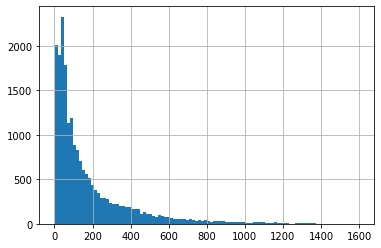

In [13]:
df['days_exposition'].hist(bins=100,range=(1,1600))

<b>Посчитайте среднее и медиану

In [14]:
display(df['days_exposition'].describe())

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

<b>Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</b> <br>
1) Из-за минимального выдающегося из общего количества значения "0", можем предположить, что им обозначены отсутствующие или пустые значения, по объектам находящимся в продаже.<br>
2) Гистограмма показывает, что в среднем продажа занимает около 156 дней. <br>
3) По данным, можно утверждать, что продажи менее 22 дня это быстрые, более 200 дней - долгие.
<br>
<br>
4) В результате более подробного анализа, можно предположить, что "выбросы" (аномально высокие значения) возникали по причинам:
 - в период экономических потрясений в стране, что стимулировало спрос на ликвидное жильё;
 - начало программ льготной ипотеки

<AxesSubplot:>

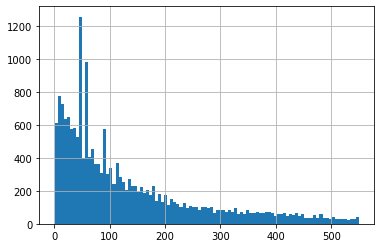

In [15]:
df['days_exposition'].hist(bins=100,range=(1,550))

<h3>Уберите редкие и выбивающиеся значения

In [16]:
display(df.info())
#Убираем значения со стоимостью более 100млн и менее 400тыс, 
#т.к. их значения значительно расширяют диапазон графиков снижая качество анализа
df['last_price'] = df['last_price'][(df['last_price'] < 100000000)&(df['last_price'] > 400000)]
#Убираем значения более 500 кв.м
df['total_area'] = df['total_area'][df['total_area'] < 500]
#Убираем значения комнат более 10
df['rooms'] = df['rooms'][df['rooms'] < 10]
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23661 non-null  Int64         
 2   total_area            23690 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23688 non-null  float64       
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

<h3>Какие факторы больше всего влияют на стоимость квартиры?

<b>Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года

            last_price  total_area
last_price    1.000000    0.766807
total_area    0.766807    1.000000


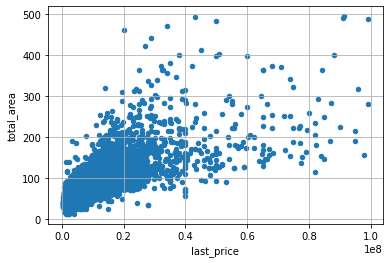

In [17]:
df.plot(x='last_price', y='total_area', grid=True, kind='scatter')
print(df[['last_price','total_area']].corr())

Стоимость житья пропорциональна стоимости квадратного метра, что может быть связано с дополнительными удобствами в помещениях с большей площадью<br>
<b>Корреляция высокая

            last_price     rooms
last_price    1.000000  0.468184
rooms         0.468184  1.000000


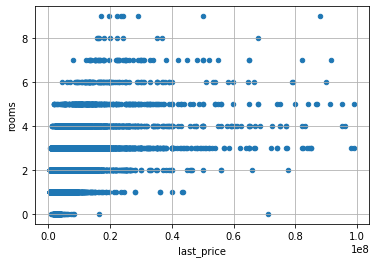

In [18]:
df.plot(x='last_price', y='rooms', grid=True, kind='scatter')
print(df[['last_price','rooms']].corr())

Наиболее востребованными являются квартиры с 3-5 комнатами<br>
<b>Корреляция средняя

            last_price     floor
last_price    1.000000  0.036429
floor         0.036429  1.000000


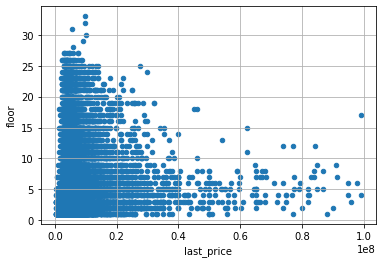

In [19]:
df.plot(x='last_price', y='floor', grid=True, kind='scatter')
print(df[['last_price','floor']].corr())

Наиболее востребованными являются квартиры на этажах до 10. Верхние этажи менее привлекательны.<br>
<b>Корреляция отсутствует

                      last_price  city_сenters_nearest
last_price              1.000000             -0.300366
city_сenters_nearest   -0.300366              1.000000


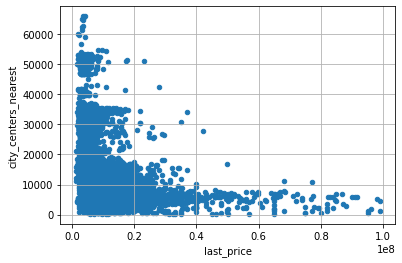

In [20]:
df.plot(x='last_price', y='city_сenters_nearest', grid=True, kind='scatter')
print(df[['last_price','city_сenters_nearest']].corr())

Закономерно, квартиры ближе к центру имеют цену выше<br>
<b>Корреляция незначительно обратная

             last_price  day_of_week
last_price     1.000000    -0.003134
day_of_week   -0.003134     1.000000


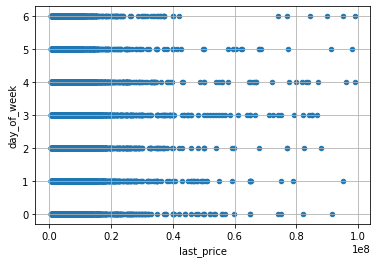

In [21]:
df.plot(x='last_price', y='day_of_week', grid=True, kind='scatter')
print(df[['last_price','day_of_week']].corr())

В середине недели активность продавцов выше<br>
<b>Корреляция отсутствует

            last_price     month
last_price    1.000000  0.007317
month         0.007317  1.000000


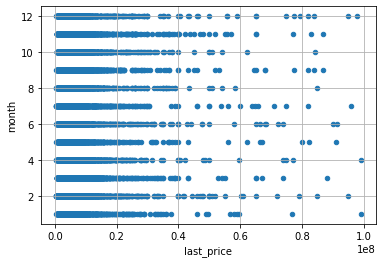

In [22]:
df.plot(x='last_price', y='month', grid=True, kind='scatter')
print(df[['last_price','month']].corr())

По месяцу - значительных колебаний нет<br>
<b>Корреляция отсутствует

            last_price      year
last_price    1.000000 -0.053668
year         -0.053668  1.000000


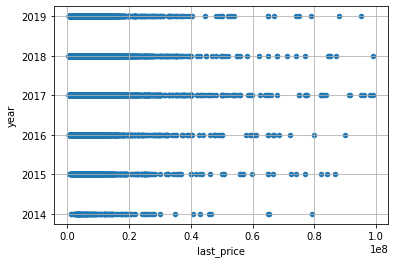

In [23]:
df.plot(x='last_price', y='year', grid=True, kind='scatter')
print(df[['last_price','year']].corr())

Наибольшую активность рынок недвижимости демонстрировал в 2017г.<br>
<b>Корреляция отсутствует

<b>Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [24]:
ln=df['locality_name'].value_counts(normalize=True).head(10)

<b>Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [25]:
df.query('locality_name in @ln.index').pivot_table(index='locality_name', values='qm_price', aggfunc='mean').sort_values('qm_price',ascending=False)

,qm_price
locality_name,
Санкт-Петербург,114848.565231
Пушкин,103125.373984
деревня Кудрово,92473.086957
поселок Парголово,90175.489297
поселок Мурино,85681.305755
поселок Шушары,78676.904545
Колпино,75424.150888
Гатчина,68745.693811
Всеволожск,68654.007538


<b>Вывод</b><br>
Из 10 самых популярных в объявлениях городов, самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая в Выборге

<h3>Изучите предложения квартир в Санкт-Петербурге

<b> Задача — выяснить, какая область входит в центр. </b><br>
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

/tmp/ipykernel_357/1464742688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['cсn_km']=(df_sp['city_сenters_nearest']/1000).round().astype('Int64')


<AxesSubplot:xlabel='cсn_km'>

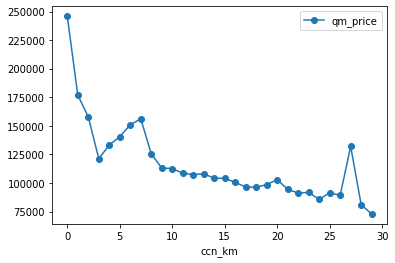

In [26]:
df_sp=df.query('locality_name == "Санкт-Петербург"')
df_sp['cсn_km']=(df_sp['city_сenters_nearest']/1000).round().astype('Int64')
display(df_sp.pivot_table(index='cсn_km', values='qm_price', aggfunc='mean').sort_values('cсn_km').plot(style='o-'))

<b> Из графика видно, что центральная зона Санкт-Петербурга в радиусе 7км от географического центра города

<h3>Выделите сегмент квартир в центре

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

<AxesSubplot:>

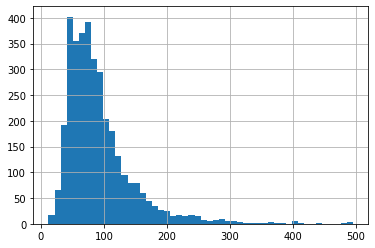

In [27]:
df_sp=df_sp.query('cсn_km < 8') #выборка значений в радиусе 7 км от центра
df_sp['total_area'].hist(bins=50)

<AxesSubplot:>

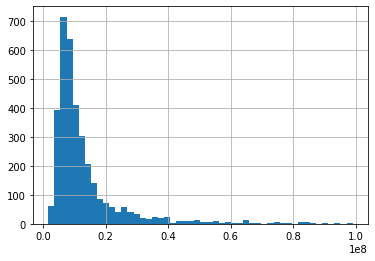

In [28]:
df_sp['last_price'].hist(bins=50)

<AxesSubplot:>

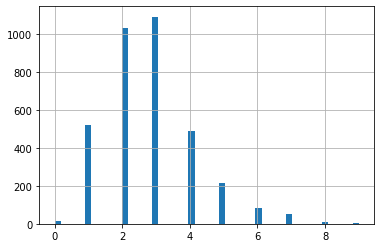

In [29]:
df_sp['rooms'].hist(bins=50)

<AxesSubplot:>

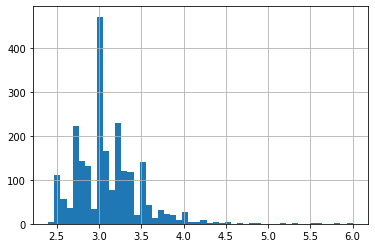

In [30]:
df_sp['ceiling_height'].hist(bins=50)

<b>Основная масса квартир в центре общей площадью от 20 до 120 кв.м., стоимостью в среднем 20млн.р., преобладающим количеством 2-3 комнат с потолками около 3-х метров

<AxesSubplot:xlabel='last_price'>

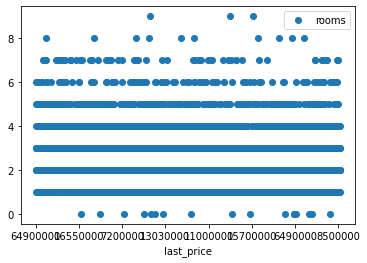

In [31]:
df_sp.plot(x='last_price', y='rooms',style='o')

<AxesSubplot:xlabel='last_price'>

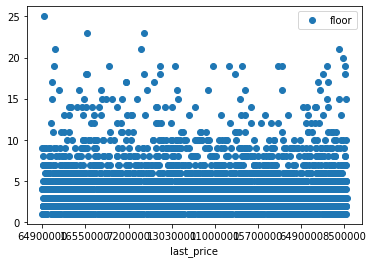

In [32]:
df_sp.plot(x='last_price', y='floor',style='o')

<AxesSubplot:xlabel='last_price'>

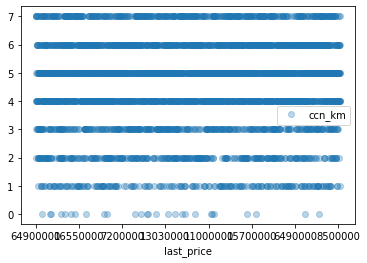

In [33]:
df_sp.plot(x='last_price', y='cсn_km',style='o',alpha=0.3)

<AxesSubplot:xlabel='last_price'>

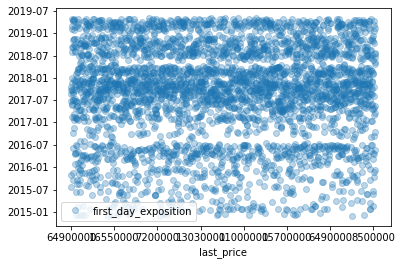

In [34]:
df_sp.plot(x='last_price', y='first_day_exposition',style='o',alpha=0.3)

<b>Изученные данные по центральным районам Санкт-Петербурга позволяют сделать выводы:</b>
 - застройка центра города предсказуемо увеличивается от центра (количество предложений возрастает);
 - преобладают здания преимущественно с потолками около 3-х метров (что выше в сравнении с остальными предложениями)
 - средняя стоимость жилья значительно выше среднерыночной 
 - этажность, позволяет судить о достаточно старой застройке, т.к. преобладают здания до 10 этажей, что характерно для советского времени


## Общий вывод

<b>В данной работе закрепили способы и методы анализа больших объёмов данных, что позволило проанализировать рынок недвижимости Ленинградской области.<br>
В результате анализа были подтверждены гипотезы о стоимости и качестве жилья в центральных районах Санкт-Петербурга и определились различия с невидимостью остальных помещений в городе и области.